In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score



In [75]:
# Load the dataset
data = pd.read_csv('healthcare _ data.csv')


In [76]:
# Explore the dataset
print(data.head())
print(data.describe())

   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


In [77]:
# View column names
print( data.columns.tolist())

# Set the target column
target_column = 'Class'

# Split features and label
X = data.drop(target_column, axis=1)
y = data[target_column]

['Recency', 'Frequency', 'Monetary', 'Time', 'Class']


In [78]:
# Identify numerical features (all are numerical here)
numerical_features = X.columns.tolist()

# Preprocessing pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [79]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [80]:
# Predictions and evaluation
y_pred = pipeline.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[99 14]
 [28  9]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150



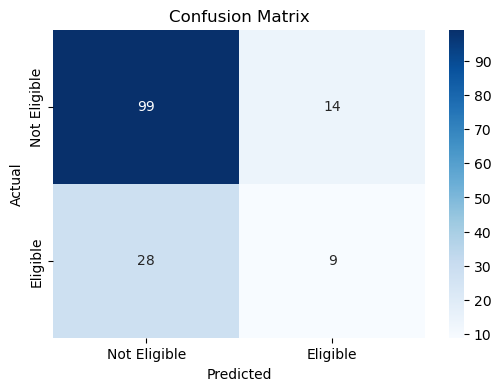

In [81]:

# Generate predictions
y_pred = pipeline.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


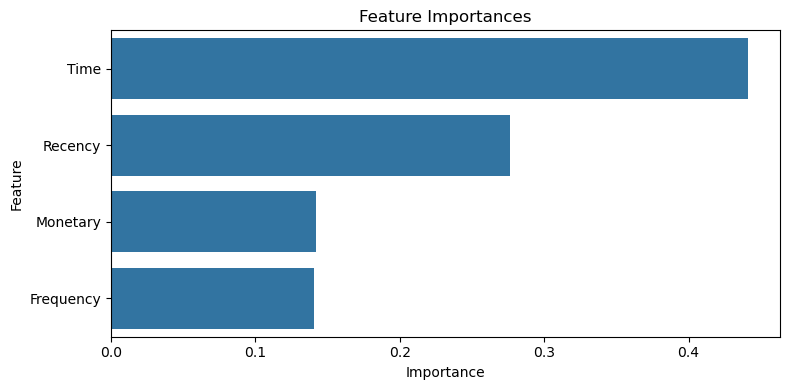

In [86]:
# Get feature importances from the model inside the pipeline
model = pipeline.named_steps['classifier']
features = X.columns

# Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



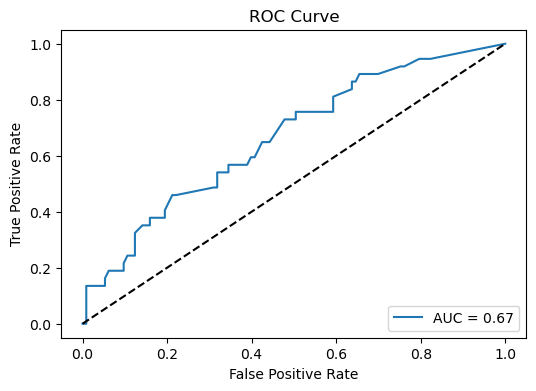

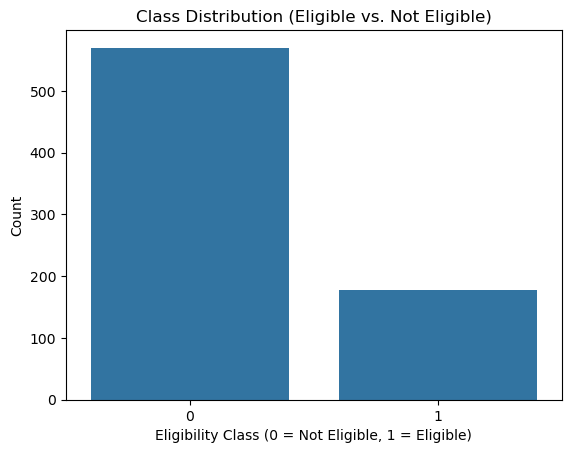

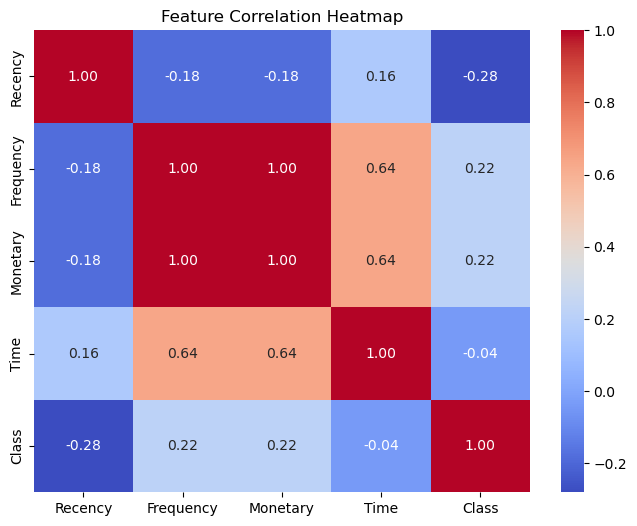

In [87]:
# Probabilities
y_probs = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 4.  Class Distribution in Data

sns.countplot(x='Class', data=data)
plt.title('Class Distribution (Eligible vs. Not Eligible)')
plt.xlabel('Eligibility Class (0 = Not Eligible, 1 = Eligible)')
plt.ylabel('Count')
plt.show()
#5.📊 Pairplot or Correlation Heatmap (Optional)
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()







In [88]:
# Generate recommendation (mocked)
def generate_recommendation(patient_data):
    predictions = pipeline.predict(patient_data)
    return 'Eligible to donate' if predictions[0] == 1 else 'Not eligible currently'

sample_patient = pd.DataFrame([{
    'Recency': 2,
    'Frequency': 50,
    'Monetary': 12500,
    'Time': 98
}])

print(generate_recommendation(sample_patient))


Eligible to donate
